### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.2 The auto-encoder problem
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys

def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        if classification:
            for p in range(prediction.shape[1]):
                if prediction[0,p] >0:
                    prediction[0,p] = 1
                else:
                    prediction[0,p] = -1
            
        return prediction

[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.0037053961425829937


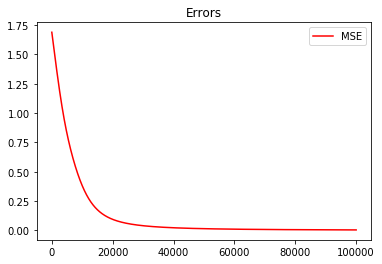

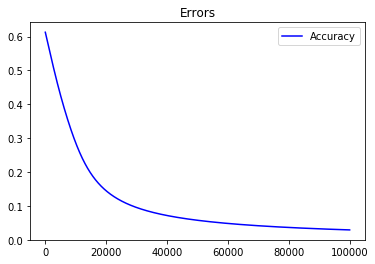

prediction
[[ 1.        ]
 [-0.93352994]
 [-0.94130851]
 [-0.93356587]
 [-0.93541351]
 [-0.95056906]
 [-0.93399061]
 [-0.94314852]]
ground truth
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.005000788594893873


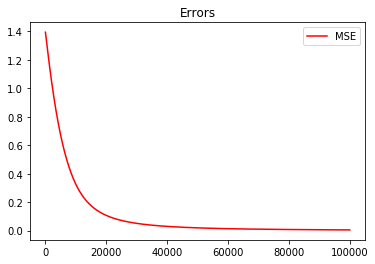

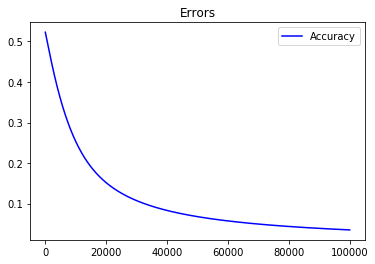

prediction
[[-1.        ]
 [ 0.93805634]
 [-0.93167439]
 [-0.95236207]
 [-0.92011239]
 [-0.93570736]
 [-0.92134067]
 [-0.91543261]]
ground truth
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.0037592744387321794


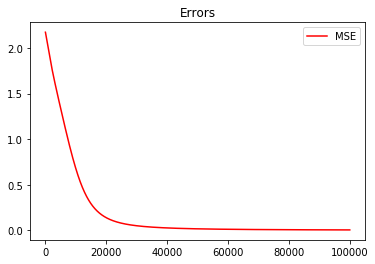

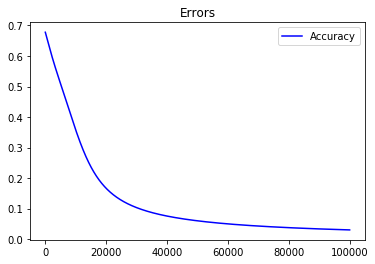

prediction
[[-1.        ]
 [-0.93475891]
 [ 0.96286788]
 [-0.94856094]
 [-0.93125449]
 [-0.93527744]
 [-0.92959594]
 [-0.930057  ]]
ground truth
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.008873447100568043


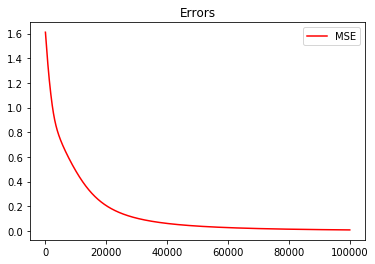

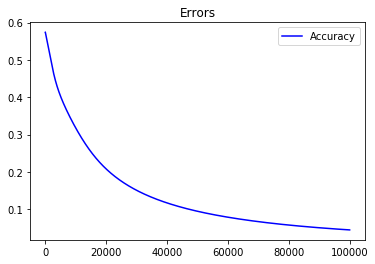

prediction
[[-1.        ]
 [-0.89834412]
 [-0.89180249]
 [ 0.88668232]
 [-0.90872239]
 [-0.92907391]
 [-0.88132015]
 [-0.90965324]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.00304561816851754


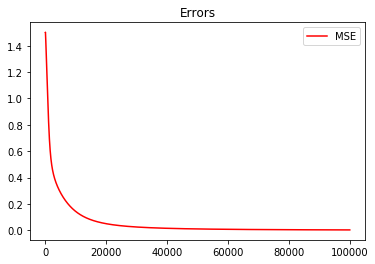

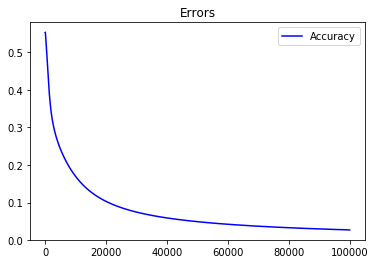

prediction
[[-1.        ]
 [-0.94384645]
 [-0.95069044]
 [-0.94461545]
 [ 0.95224076]
 [-0.93421575]
 [-0.93730135]
 [-0.93810899]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.003501756456076493


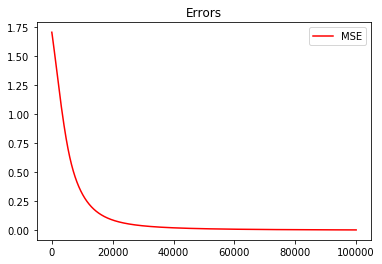

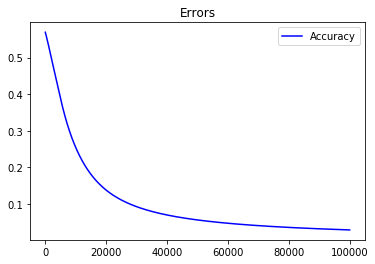

prediction
[[-1.        ]
 [-0.93312163]
 [-0.93846042]
 [-0.93395933]
 [-0.93814862]
 [ 0.98079325]
 [-0.94356372]
 [-0.93962588]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
MSE:  0.0039054176694600347


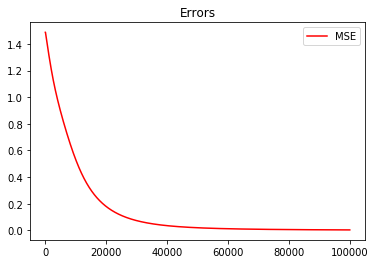

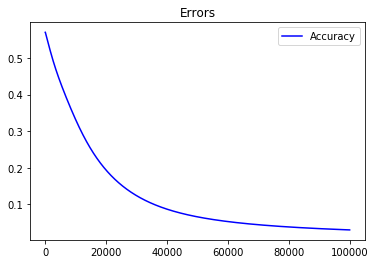

prediction
[[-1.        ]
 [-0.95660175]
 [-0.9307532 ]
 [-0.94045874]
 [-0.95218507]
 [-0.9251319 ]
 [ 0.91290193]
 [-0.95370351]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]
MSE:  0.005645878111293672


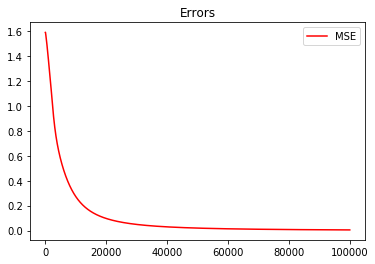

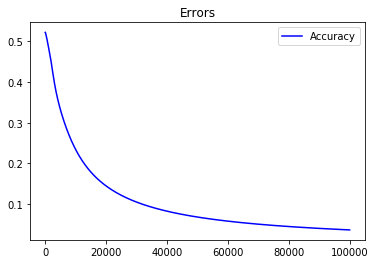

prediction
[[-1.        ]
 [-0.91885695]
 [-0.94322842]
 [-0.9134736 ]
 [-0.89793797]
 [-0.95415709]
 [-0.9236757 ]
 [ 0.91810646]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]
mse
acc


In [21]:
eta = 1e-4
n_in = 8
n_out = 8
scale = 1
hidden_perceptrons = 3
epochs = 100000

class_A = np.eye(n_in)
class_A = np.eye(n_in)
for x in np.nditer(class_A, op_flags = ['readwrite']):
    if x == 0:
        x[...] = -1
X = np.vstack([class_A,np.ones(n_in)])

#print(X)

#print(X.shape)
#print(T)


for i in range(X.shape[1]):
    T = -np.ones(n_in)
    T[i] = 1
    x = X[:,i]
    x = x.reshape(-1,1)
    print(x)
    #x = np.hstack((x,x))
    #print(x)
    T = T.reshape(-1,1)
    W = scale*np.random.randn(hidden_perceptrons,np.shape(x)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)    
    W_train,V_train,mse,acc = backprop(eta,x,T,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    #print(W_train[-1,:,:])
    plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
    plt.legend(handles=[plt_mse])
    print("MSE: ", mse[-1])
    
    #plt.axis([0,20,0,100])
    plt.title('Errors')
    plt.show()
    plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
    plt.legend(handles=[plt_acc])
    plt.title('Errors')
    plt.show()
    p = predict(x,W_train[-1,:,:], V_train[-1,:,:],True)
    print("prediction")
    print(p)
    print("ground truth")
    print(x)
    
print("mse")
#print(mse)
print("acc")
#print(acc)

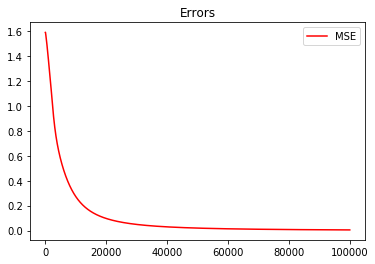

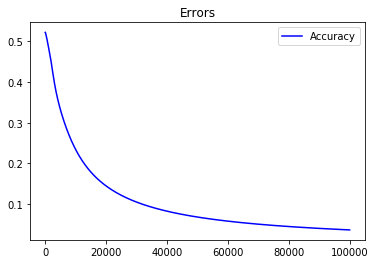

In [22]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

• Does the network always converge and map inputs to themselves? Yes

(100001, 3, 9)


<Figure size 432x288 with 0 Axes>

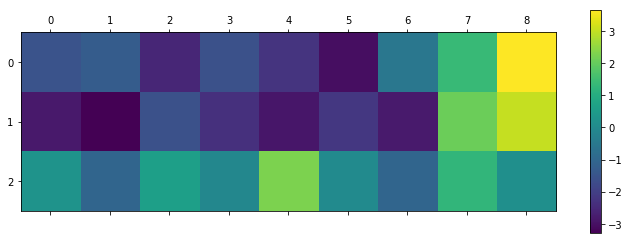

In [28]:
#Showing activation of Hidden layer
plt.figure()
print(W_train.shape)
Z = W_train[-1,:,:]
mat = plt.matshow(Z)
plt.colorbar(mat)
plt.savefig("weightmatrix.png")
plt.show()

#### 3.2.2.3 8-2-8 Arcitechture

MSE:  0.004699869934832111


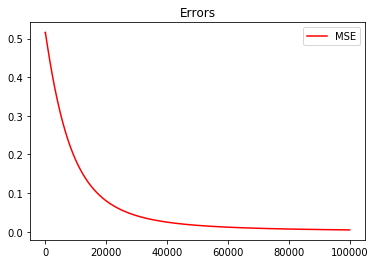

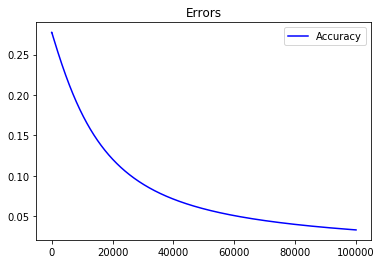

prediction
[[ 1.        ]
 [-0.92886769]
 [-0.94976132]
 [-0.93059412]
 [-0.92346517]
 [-0.93023092]
 [-0.94293588]
 [-0.90141712]]
ground truth
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.00661743119762051


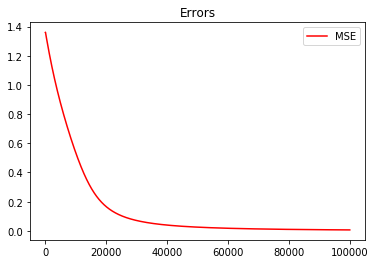

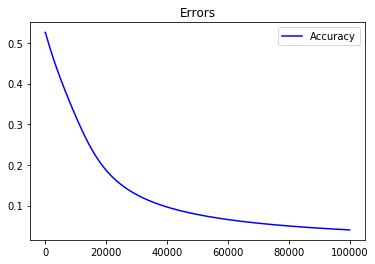

prediction
[[-1.        ]
 [ 0.91685726]
 [-0.91874663]
 [-0.91329794]
 [-0.9161329 ]
 [-0.91855403]
 [-0.93965243]
 [-0.925614  ]]
ground truth
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.00632457388845132


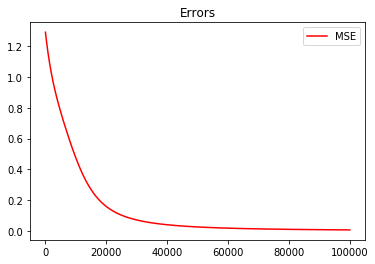

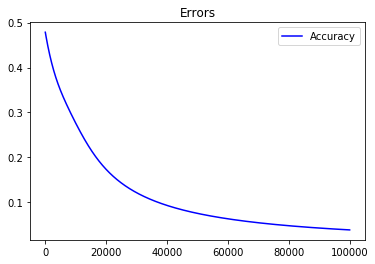

prediction
[[-1.        ]
 [-0.90404908]
 [ 0.91865669]
 [-0.91571895]
 [-0.97494964]
 [-0.91074494]
 [-0.93482766]
 [-0.92251388]]
ground truth
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.010981011705652813


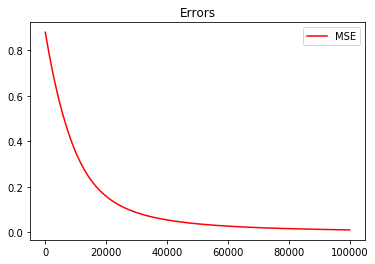

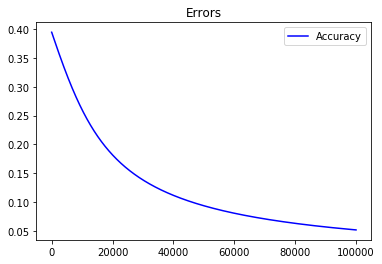

prediction
[[-1.        ]
 [-0.93234607]
 [-0.86447144]
 [ 0.88891115]
 [-0.89164707]
 [-0.90186696]
 [-0.89976717]
 [-0.88350869]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.006450915230330275


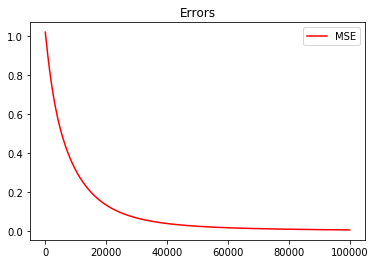

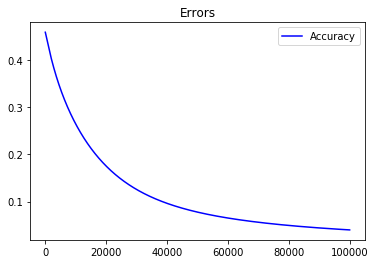

prediction
[[-1.        ]
 [-0.93868112]
 [-0.92055252]
 [-0.91902783]
 [ 0.92302325]
 [-0.92893612]
 [-0.90382228]
 [-0.9099991 ]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.0062336830214945755


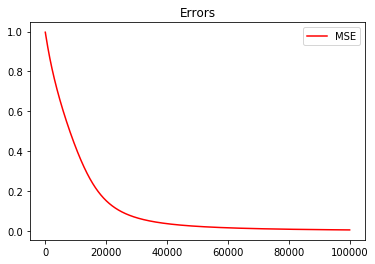

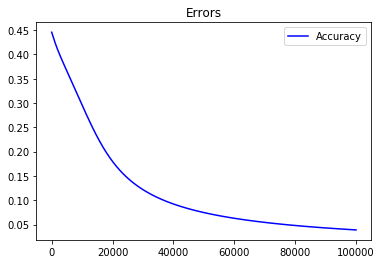

prediction
[[-1.        ]
 [-0.91330785]
 [-0.92562644]
 [-0.95240787]
 [-0.91636918]
 [ 0.9327338 ]
 [-0.90588982]
 [-0.91158448]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.01254590357150041


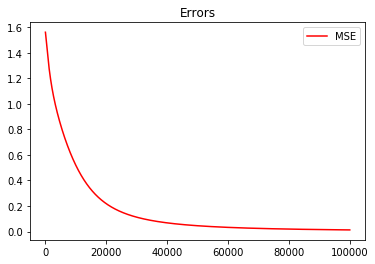

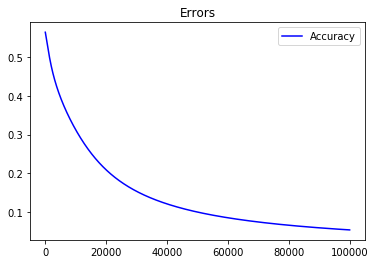

prediction
[[-1.        ]
 [-0.8629647 ]
 [-0.96142267]
 [-0.86667525]
 [-0.87961532]
 [-0.90538642]
 [ 0.88809349]
 [-0.87697069]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
MSE:  0.012081480120734109


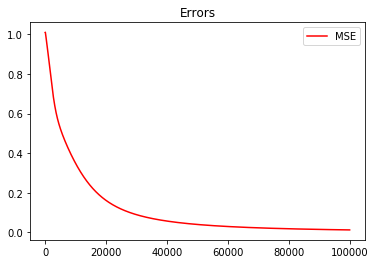

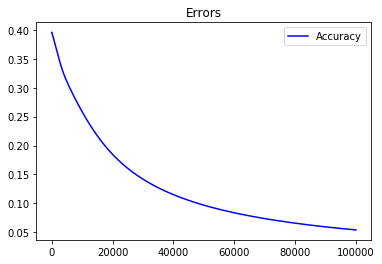

prediction
[[-1.        ]
 [-0.91745694]
 [-0.86442832]
 [-0.89489018]
 [-0.90702791]
 [-0.8997817 ]
 [-0.8654318 ]
 [ 0.9056505 ]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]
mse
acc


In [15]:
eta = 1e-4
n_in = 8
n_out = 8
scale = 1
hidden_perceptrons = 2
epochs = 100000

class_A = np.eye(n_in)
class_A = np.eye(n_in)
for x in np.nditer(class_A, op_flags = ['readwrite']):
    if x == 0:
        x[...] = -1
X = np.vstack([class_A,np.ones(n_in)])

#print(X)

#print(X.shape)
#print(T)


for i in range(X.shape[1]):
    T = -np.ones(n_in)
    T[i] = 1
    x = X[:,i]
    x = x.reshape(-1,1)
    #x = np.hstack((x,x))
    #print(x)
    T = T.reshape(-1,1)
    W = scale*np.random.randn(hidden_perceptrons,np.shape(x)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)    
    W_train,V_train,mse,acc = backprop(eta,x,T,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    #print(W_train[-1,:,:])
    plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
    plt.legend(handles=[plt_mse])
    print("MSE: ", mse[-1])
    
    #plt.axis([0,20,0,100])
    plt.title('Errors')
    plt.show()
    plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
    plt.legend(handles=[plt_acc])
    plt.title('Errors')
    plt.show()
    p = predict(x,W_train[-1,:,:], V_train[-1,:,:],True)
    print("prediction")
    print(p)
    print("ground truth")
    print(x)
    
print("mse")
#print(mse)
print("acc")
#print(acc)

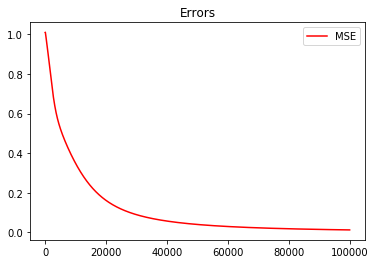

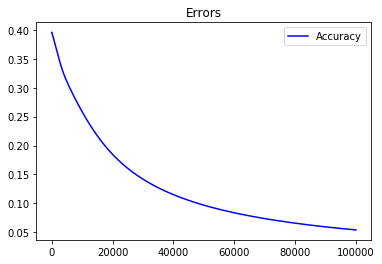

In [16]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

AutoEncoders could serve the purpose of reducing the dimentionality of a problem without neccesarily understading the meaning of the dimensions from a physical perspective. This could be benifitial in for instance optimization applications. 

(100001, 2, 9)


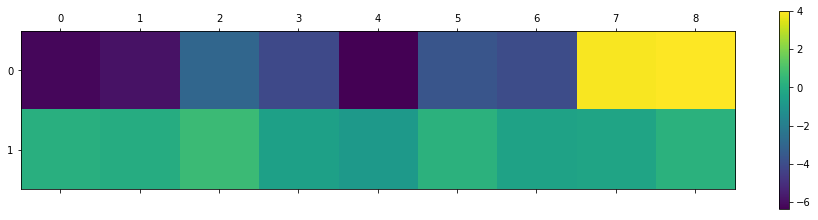

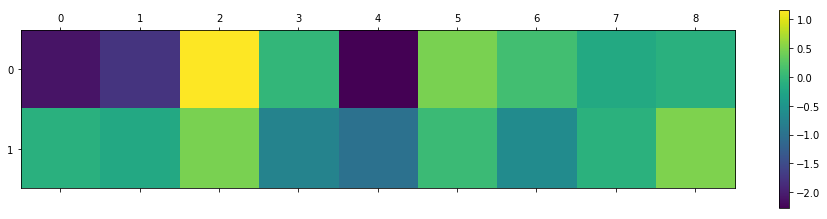

In [20]:
print(W_train.shape)
Z = W_train[-1,:,:]
mat = plt.matshow(Z)
plt.colorbar(mat)
plt.show()
Z = W_train[2,:,:]
mat = plt.matshow(Z)
plt.colorbar(mat)
plt.show()